<a href="https://colab.research.google.com/github/PRETTYMARTHA/Prediction-of-product-sales/blob/main/Resampling_Datetime_core.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Martha Nairuba

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
# import matplotlib.ticker as mticks

import missingno as miss

import seaborn as sns
import numpy as np
from sklearn.impute import SimpleImputer

pd.set_option('display.float_format',lambda x:f"{x:,.2f}")

import warnings
warnings.filterwarnings('ignore')

In [2]:
sns.set_context('notebook', font_scale=0.9)
plt.style.use(['ggplot'])

In [3]:
#Import my drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv("/content/drive/MyDrive/london_weather_MODIFIED - london_weather_MODIFIED.csv")
df

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.00,7.00,52.00,2.30,-4.10,-7.50,0.40,"101,900.00",9.00
1,19790102,6.00,1.70,27.00,1.60,-2.60,-7.50,0.00,"102,530.00",8.00
2,19790103,5.00,0.00,13.00,1.30,-2.80,-7.20,0.00,"102,050.00",4.00
3,19790104,8.00,0.00,13.00,-0.30,-2.60,-6.50,0.00,"100,840.00",2.00
4,19790105,6.00,2.00,29.00,5.60,-0.80,-1.40,0.00,"102,250.00",1.00
...,...,...,...,...,...,...,...,...,...,...
15336,20201227,1.00,0.90,32.00,7.50,7.50,7.60,2.00,"98,000.00",NaN
15337,20201228,7.00,3.70,38.00,3.60,1.10,-1.30,0.20,"97,370.00",NaN
15338,20201229,7.00,0.00,21.00,4.10,2.60,1.10,0.00,"98,830.00",NaN
15339,20201230,6.00,0.40,22.00,5.60,2.70,-0.10,0.00,"100,200.00",NaN


In [5]:
df.info()
df.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              15341 non-null  int64  
 1   cloud_cover       14938 non-null  float64
 2   sunshine          14957 non-null  float64
 3   global_radiation  14939 non-null  float64
 4   max_temp          14951 non-null  float64
 5   mean_temp         14922 non-null  float64
 6   min_temp          14955 non-null  float64
 7   precipitation     14951 non-null  float64
 8   pressure          14953 non-null  float64
 9   snow_depth        13589 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 1.2 MB


,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.00,7.00,52.00,2.30,-4.10,-7.50,0.40,"101,900.00",9.00
1,19790102,6.00,1.70,27.00,1.60,-2.60,-7.50,0.00,"102,530.00",8.00
2,19790103,5.00,0.00,13.00,1.30,-2.80,-7.20,0.00,"102,050.00",4.00


In [6]:
#Convert the date clumn to datetime dtype
df['datetime'] = pd.to_datetime(df['date'])
df.info()
df.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              15341 non-null  int64         
 1   cloud_cover       14938 non-null  float64       
 2   sunshine          14957 non-null  float64       
 3   global_radiation  14939 non-null  float64       
 4   max_temp          14951 non-null  float64       
 5   mean_temp         14922 non-null  float64       
 6   min_temp          14955 non-null  float64       
 7   precipitation     14951 non-null  float64       
 8   pressure          14953 non-null  float64       
 9   snow_depth        13589 non-null  float64       
 10  datetime          15341 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(9), int64(1)
memory usage: 1.3 MB


,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth,datetime
0,19790101,2.00,7.00,52.00,2.30,-4.10,-7.50,0.40,"101,900.00",9.00,1970-01-01 00:00:00.019790101
1,19790102,6.00,1.70,27.00,1.60,-2.60,-7.50,0.00,"102,530.00",8.00,1970-01-01 00:00:00.019790102
2,19790103,5.00,0.00,13.00,1.30,-2.80,-7.20,0.00,"102,050.00",4.00,1970-01-01 00:00:00.019790103


In [9]:
df.isna().sum()

date                   0
cloud_cover          403
sunshine             384
global_radiation     402
max_temp             390
mean_temp            419
min_temp             386
precipitation        390
pressure             388
snow_depth          1752
dtype: int64

In [10]:
# Checking the data type of the date column
df['date'].dtypes

dtype('int64')

In [11]:
# Converting the date column to string
if df['date'].dtypes != 'object':
    df['date'] = df['date'].astype(str)
df['date']

datetime
1970-01-01 00:00:00.019790101    19790101
1970-01-01 00:00:00.019790102    19790102
1970-01-01 00:00:00.019790103    19790103
1970-01-01 00:00:00.019790104    19790104
1970-01-01 00:00:00.019790105    19790105
                                   ...   
1970-01-01 00:00:00.020201227    20201227
1970-01-01 00:00:00.020201228    20201228
1970-01-01 00:00:00.020201229    20201229
1970-01-01 00:00:00.020201230    20201230
1970-01-01 00:00:00.020201231    20201231
Name: date, Length: 15341, dtype: object

In [12]:
# Removing leading and trailing whitespace from the string
df['date'] = df['date'].str.strip()
df.head()

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
datetime,,,,,,,,,,
1970-01-01 00:00:00.019790101,19790101,2.00,7.00,52.00,2.30,-4.10,-7.50,0.40,"101,900.00",9.00
1970-01-01 00:00:00.019790102,19790102,6.00,1.70,27.00,1.60,-2.60,-7.50,0.00,"102,530.00",8.00
1970-01-01 00:00:00.019790103,19790103,5.00,0.00,13.00,1.30,-2.80,-7.20,0.00,"102,050.00",4.00
1970-01-01 00:00:00.019790104,19790104,8.00,0.00,13.00,-0.30,-2.60,-6.50,0.00,"100,840.00",2.00
1970-01-01 00:00:00.019790105,19790105,6.00,2.00,29.00,5.60,-0.80,-1.40,0.00,"102,250.00",1.00


In [13]:
# Converting the string to datetime objects
df['datetime'] = pd.to_datetime(df['date'], format='%Y%m%d')
df.head()

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth,datetime
datetime,,,,,,,,,,,
1970-01-01 00:00:00.019790101,19790101,2.00,7.00,52.00,2.30,-4.10,-7.50,0.40,"101,900.00",9.00,1979-01-01
1970-01-01 00:00:00.019790102,19790102,6.00,1.70,27.00,1.60,-2.60,-7.50,0.00,"102,530.00",8.00,1979-01-02
1970-01-01 00:00:00.019790103,19790103,5.00,0.00,13.00,1.30,-2.80,-7.20,0.00,"102,050.00",4.00,1979-01-03
1970-01-01 00:00:00.019790104,19790104,8.00,0.00,13.00,-0.30,-2.60,-6.50,0.00,"100,840.00",2.00,1979-01-04
1970-01-01 00:00:00.019790105,19790105,6.00,2.00,29.00,5.60,-0.80,-1.40,0.00,"102,250.00",1.00,1979-01-05


In [7]:
#Setting the date column as the index
df = df.set_index('datetime')
df


,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
datetime,,,,,,,,,,
1970-01-01 00:00:00.019790101,19790101,2.00,7.00,52.00,2.30,-4.10,-7.50,0.40,"101,900.00",9.00
1970-01-01 00:00:00.019790102,19790102,6.00,1.70,27.00,1.60,-2.60,-7.50,0.00,"102,530.00",8.00
1970-01-01 00:00:00.019790103,19790103,5.00,0.00,13.00,1.30,-2.80,-7.20,0.00,"102,050.00",4.00
1970-01-01 00:00:00.019790104,19790104,8.00,0.00,13.00,-0.30,-2.60,-6.50,0.00,"100,840.00",2.00
1970-01-01 00:00:00.019790105,19790105,6.00,2.00,29.00,5.60,-0.80,-1.40,0.00,"102,250.00",1.00
...,...,...,...,...,...,...,...,...,...,...
1970-01-01 00:00:00.020201227,20201227,1.00,0.90,32.00,7.50,7.50,7.60,2.00,"98,000.00",NaN
1970-01-01 00:00:00.020201228,20201228,7.00,3.70,38.00,3.60,1.10,-1.30,0.20,"97,370.00",NaN
1970-01-01 00:00:00.020201229,20201229,7.00,0.00,21.00,4.10,2.60,1.10,0.00,"98,830.00",NaN


In [14]:
#Keep only data from the year 2000 or later
year_to_filter = 2000
filtered_df = df[df['datetime'].dt.year >= year_to_filter]
filtered_df.head()
df = filtered_df
df2 = filtered_df
df3 = filtered_df
df4 = filtered_df



In [15]:
# Columns to keep
columns_to_keep = ['precipitation','mean_temp','min_temp','max_temp','snow_depth']
# Drop columns except the ones specified
columns_to_drop = set(df.columns) - set(columns_to_keep)
columns_to_drop
df = df.drop(columns=columns_to_drop)
df.head()

,max_temp,mean_temp,min_temp,precipitation,snow_depth
datetime,,,,,
1970-01-01 00:00:00.020000101,10.80,7.00,4.90,0.00,0.00
1970-01-01 00:00:00.020000102,11.50,7.90,5.00,0.20,0.00
1970-01-01 00:00:00.020000103,9.50,9.40,7.20,6.00,0.00
1970-01-01 00:00:00.020000104,11.00,7.00,4.40,0.20,0.00
1970-01-01 00:00:00.020000105,10.80,6.40,1.90,0.80,0.00


In [16]:
#Checking datatypes
df.dtypes

max_temp         float64
mean_temp        float64
min_temp         float64
precipitation    float64
snow_depth       float64
dtype: object

In [31]:
#Imputing missing values
df.isna().sum()

max_temp         0
mean_temp        0
min_temp         0
precipitation    0
snow_depth       0
dtype: int64

In [19]:
# Defining numeric and categorical columns
numeric_columns = df.select_dtypes(include=['float'])
# use simple median imputer to fill the missing values
numeric_imputer = SimpleImputer(strategy='mean')
numeric_imputed = numeric_imputer.fit_transform(numeric_columns)
# Assign imputed values back to the DataFrame
df[numeric_columns.columns] = numeric_imputed
df.head()

,max_temp,mean_temp,min_temp,precipitation,snow_depth
datetime,,,,,
1970-01-01 00:00:00.020000101,10.80,7.00,4.90,0.00,0.00
1970-01-01 00:00:00.020000102,11.50,7.90,5.00,0.20,0.00
1970-01-01 00:00:00.020000103,9.50,9.40,7.20,6.00,0.00
1970-01-01 00:00:00.020000104,11.00,7.00,4.40,0.20,0.00
1970-01-01 00:00:00.020000105,10.80,6.40,1.90,0.80,0.00


In [32]:
#Imputing missing values
df.isna().sum()

max_temp         0
mean_temp        0
min_temp         0
precipitation    0
snow_depth       0
dtype: int64

In [21]:
# Specifying the two-year period
start_year = 2000
end_year = 2010

# Filter the DataFrame for the specified two-year period
filtered_df2 = df2[(df2['datetime'].dt.year >= start_year) & (df2['datetime'].dt.year <= end_year)]

print(filtered_df2)

                                   date  cloud_cover  sunshine  \
datetime                                                         
1970-01-01 00:00:00.020000101  20000101         7.00      0.40   
1970-01-01 00:00:00.020000102  20000102         7.00      0.70   
1970-01-01 00:00:00.020000103  20000103         8.00      0.00   
1970-01-01 00:00:00.020000104  20000104         5.00      2.90   
1970-01-01 00:00:00.020000105  20000105         5.00      1.30   
...                                 ...          ...       ...   
1970-01-01 00:00:00.020101227  20101227         8.00      0.00   
1970-01-01 00:00:00.020101228  20101228         8.00      0.00   
1970-01-01 00:00:00.020101229  20101229         8.00      0.00   
1970-01-01 00:00:00.020101230  20101230         8.00      0.00   
1970-01-01 00:00:00.020101231  20101231         8.00      0.00   

                               global_radiation  max_temp  mean_temp  \
datetime                                                             

In [22]:
# Getting the month
df2['Month'] = df2['datetime'].dt.month
df2.head()

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth,datetime,Month
datetime,,,,,,,,,,,,
1970-01-01 00:00:00.020000101,20000101,7.00,0.40,18.00,10.80,7.00,4.90,0.00,"102,450.00",0.00,2000-01-01,1
1970-01-01 00:00:00.020000102,20000102,7.00,0.70,20.00,11.50,7.90,5.00,0.20,"102,530.00",0.00,2000-01-02,1
1970-01-01 00:00:00.020000103,20000103,8.00,0.00,13.00,9.50,9.40,7.20,6.00,"101,860.00",0.00,2000-01-03,1
1970-01-01 00:00:00.020000104,20000104,5.00,2.90,34.00,11.00,7.00,4.40,0.20,"101,480.00",0.00,2000-01-04,1
1970-01-01 00:00:00.020000105,20000105,5.00,1.30,25.00,10.80,6.40,1.90,0.80,"101,420.00",0.00,2000-01-05,1


In [23]:
df2.isna().sum()

date                   0
cloud_cover          389
sunshine             384
global_radiation     389
max_temp             390
mean_temp            419
min_temp             386
precipitation        390
pressure             387
snow_depth          1752
datetime               0
Month                  0
dtype: int64

In [24]:
# Defining numeric and categorical columns
numeric_columns = df2.select_dtypes(include=['float'])
# use simple median imputer to fill the missing values
numeric_imputer = SimpleImputer(strategy='mean')
numeric_imputed = numeric_imputer.fit_transform(numeric_columns)
# Assign imputed values back to the DataFrame
df2[numeric_columns.columns] = numeric_imputed
df2.isna().sum()

date                0
cloud_cover         0
sunshine            0
global_radiation    0
max_temp            0
mean_temp           0
min_temp            0
precipitation       0
pressure            0
snow_depth          0
datetime            0
Month               0
dtype: int64

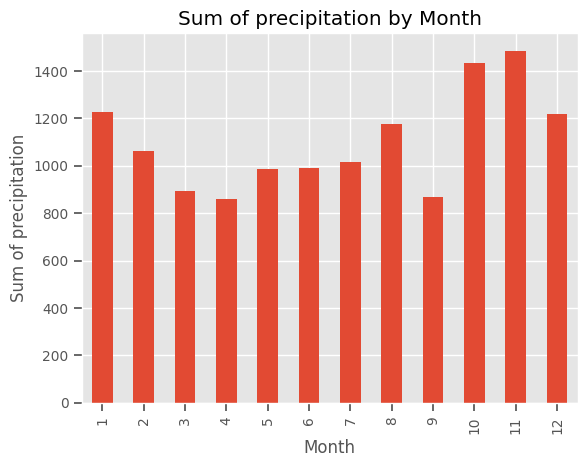

In [25]:
# Grouping the data by month and sum the values for each month
monthly_data = df2.groupby(df2['datetime'].dt.month)['precipitation'].sum()
# Plot the bar plot
monthly_data.plot(kind='bar', xlabel='Month', ylabel='Sum of precipitation', title='Sum of precipitation by Month')
plt.show()

In [26]:
max_precipitation_row = df2.loc[df2['precipitation'] == df2['precipitation'].max()]
max_precipitation_row

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth,datetime,Month
datetime,,,,,,,,,,,,
1970-01-01 00:00:00.020150826,20150826,6.00,3.40,140.00,19.60,17.00,14.10,51.60,"100,420.00",0.00,2015-08-26,8


In [27]:
#Finding the date and corresponding value for the max precipitation.
max_precipitation_date = max_precipitation_row['datetime'].values[0]
max_precipitation_value = max_precipitation_row['precipitation'].values[0]
print(max_precipitation_date)
print(max_precipitation_value)

2015-08-26T00:00:00.000000000
51.6


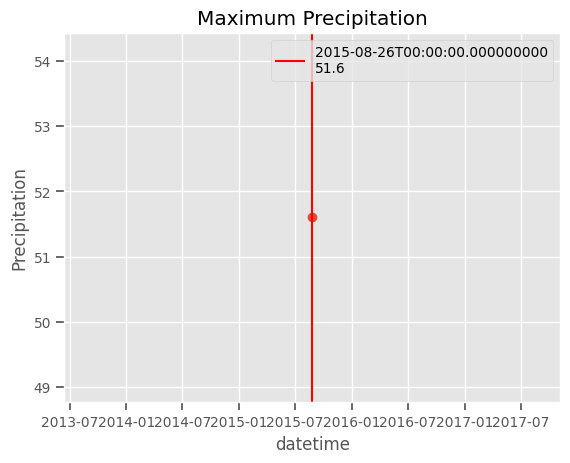

In [28]:
# Extracting the date and value from the previously obtained row
max_precipitation_date = max_precipitation_row['datetime'].values[0]
max_precipitation_value = max_precipitation_row['precipitation'].values[0]

# Plot the data point
plt.plot(max_precipitation_date, max_precipitation_value, marker='o')

# Label the axes
plt.xlabel("datetime")
plt.ylabel("Precipitation")
# Add title
plt.title("Maximum Precipitation")
# Add vertical line with label
plt.axvline(x=max_precipitation_date, color='red', label=f'{max_precipitation_date}\n{max_precipitation_value}')

# Show the legend
plt.legend()

# Show the plot
plt.show()

In [29]:
# Specifying the two-year period
start_year = 2000
end_year = 2020
years = df2[(df2['datetime'].dt.year >= start_year) & (df2['datetime'].dt.year <= end_year)]#list(range(2000, 2021))
years

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth,datetime,Month
datetime,,,,,,,,,,,,
1970-01-01 00:00:00.020000101,20000101,7.00,0.40,18.00,10.80,7.00,4.90,0.00,"102,450.00",0.00,2000-01-01,1
1970-01-01 00:00:00.020000102,20000102,7.00,0.70,20.00,11.50,7.90,5.00,0.20,"102,530.00",0.00,2000-01-02,1
1970-01-01 00:00:00.020000103,20000103,8.00,0.00,13.00,9.50,9.40,7.20,6.00,"101,860.00",0.00,2000-01-03,1
1970-01-01 00:00:00.020000104,20000104,5.00,2.90,34.00,11.00,7.00,4.40,0.20,"101,480.00",0.00,2000-01-04,1
1970-01-01 00:00:00.020000105,20000105,5.00,1.30,25.00,10.80,6.40,1.90,0.80,"101,420.00",0.00,2000-01-05,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1970-01-01 00:00:00.020201227,20201227,1.00,0.90,32.00,7.50,7.50,7.60,2.00,"98,000.00",0.02,2020-12-27,12
1970-01-01 00:00:00.020201228,20201228,7.00,3.70,38.00,3.60,1.10,-1.30,0.20,"97,370.00",0.02,2020-12-28,12
1970-01-01 00:00:00.020201229,20201229,7.00,0.00,21.00,4.10,2.60,1.10,0.00,"98,830.00",0.02,2020-12-29,12


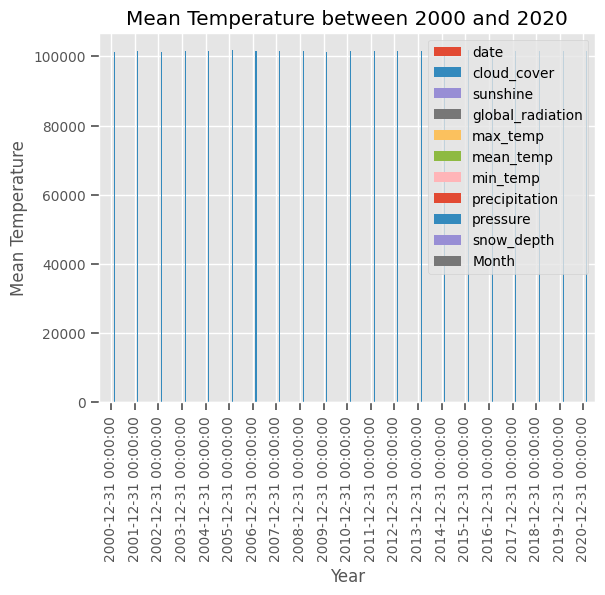

Coolest year: 2000-12-31 00:00:00
Average temperature: date                      inf
cloud_cover              5.72
sunshine                 4.20
global_radiation       115.12
max_temp                15.15
mean_temp               11.56
min_temp                 7.98
precipitation            2.08
pressure           101,348.72
snow_depth               0.01
Month                    6.51
Name: 2000-12-31 00:00:00, dtype: object


In [30]:
# Seting date column as the index
df2.set_index('datetime', inplace=True)
# Extract mean temperature data for years between 2000 and 2020
mean_temp_yearly = df2.resample('Y').mean()
# Plot the mean temperature for each year
mean_temp_yearly.plot(kind='bar')
plt.xlabel("Year")
plt.ylabel("Mean Temperature")
plt.title("Mean Temperature between 2000 and 2020")
# Add vertical line with label
plt.axvline(x=mean_temp_yearly.mean().iloc[0], color='red')
# Show the legend
plt.legend()
plt.show()
# Find the year with the coolest average temperature
coolest_year = mean_temp_yearly.mean(axis=1).sort_values().index[0]
# Print the coolest year and its average temperature
print(f"Coolest year: {coolest_year}")
print(f"Average temperature: {mean_temp_yearly.loc[coolest_year]}")